In [1]:
import numpy as np
from simple import nmf_son, nmf_son_acc
import matplotlib.pyplot as plt

np.random.seed(42)
np.set_printoptions(precision=3)

In [2]:
def load_results(filepath):
    data = np.load(filepath)
    return data['Wb'], data['Hb'], data['Wl'], data['Hl'], data['fscores'], data['gscores'], data['lambda_vals']

In [3]:
X = np.load('urban/2022_11_17/small/X.npz')['X']

## Rank = 6

In [4]:
# data = np.load('urban/2022_11_17/small/r6_ini.npz')
rank = 6
ini_W = np.random.rand(X.shape[0], rank)
ini_H = np.random.rand(rank, X.shape[1])

In [5]:
reg = 2
iters = 200
aa_size = 2

In [6]:
%%time
_, _, _, _, fscores_base, gscores_base, lambda_vals_base = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, scale_lambda=True)

CPU times: user 49.7 s, sys: 3.4 s, total: 53.1 s
Wall time: 6.93 s


In [7]:
%%time
_, _, _, _, fscores_z2, gscores_z2, lambda_vals_z2 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, scale_lambda=True, andersen_type='z', andersen_win=aa_size)

CPU times: user 1min 14s, sys: 7.19 s, total: 1min 21s
Wall time: 10.6 s


In [8]:
%%time
_, _, _, _, fscores_all2, gscores_all2, lambda_vals_all2 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, scale_lambda=True, andersen_type='all', andersen_win=aa_size)

CPU times: user 3min, sys: 51.6 s, total: 3min 52s
Wall time: 30.3 s


In [9]:
%%time
_, _, _, _, fscores_acc, gscores_acc, lambda_vals_acc = nmf_son_acc(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, scale_lambda=True)

CPU times: user 26.4 s, sys: 2.84 s, total: 29.3 s
Wall time: 3.84 s


In [10]:
total_scores_base = fscores_base + lambda_vals_base * gscores_base
total_scores_z2 = fscores_z2 + lambda_vals_z2 * gscores_z2
total_scores_all2 = fscores_all2+ lambda_vals_all2 * gscores_all2
total_scores_acc = fscores_acc + lambda_vals_acc * gscores_acc

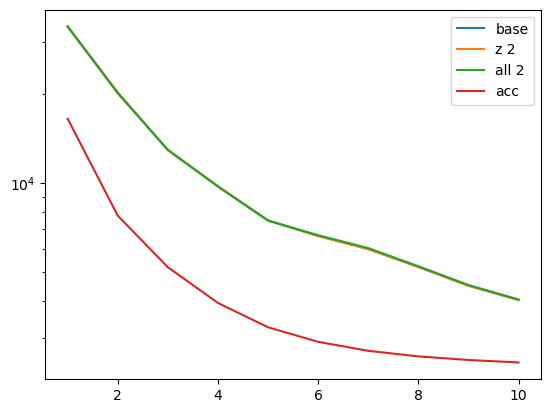

In [11]:
plt.yscale('log')
plt.plot(total_scores_base)
plt.plot(total_scores_z2)
plt.plot(total_scores_all2)
plt.plot(total_scores_acc)
plt.legend(['base', 'z 2', 'all 2', 'acc'])

In [12]:
_, _, _, _, fscores_z3, gscores_z3, lambda_vals_z3 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, scale_lambda=True, andersen_type='z', andersen_win=2)
_, _, _, _, fscores_z4, gscores_z4, lambda_vals_z4 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, scale_lambda=True, andersen_type='z', andersen_win=4)

In [13]:
total_scores_z3 = fscores_z3 + lambda_vals_z3 * gscores_z3
total_scores_z4 = fscores_z4 + lambda_vals_z4 * gscores_z4

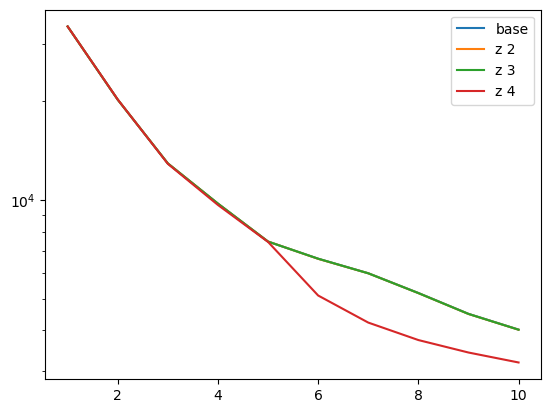

In [14]:
plt.yscale('log')
plt.plot(total_scores_base)
plt.plot(total_scores_z2)
plt.plot(total_scores_z3)
plt.plot(total_scores_z4)
plt.legend(['base', 'z 2', 'z 3', 'z 4'])

In [15]:
_, _, _, _, fscores_all3, gscores_all3, lambda_vals_all3 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, scale_lambda=True, andersen_type='all', andersen_win=2)
_, _, _, _, fscores_all4, gscores_all4, lambda_vals_all4 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, scale_lambda=True, andersen_type='all', andersen_win=4)

In [16]:
total_scores_all3 = fscores_all3 + lambda_vals_all3 * gscores_all3
total_scores_all4 = fscores_all4 + lambda_vals_all4 * gscores_all4

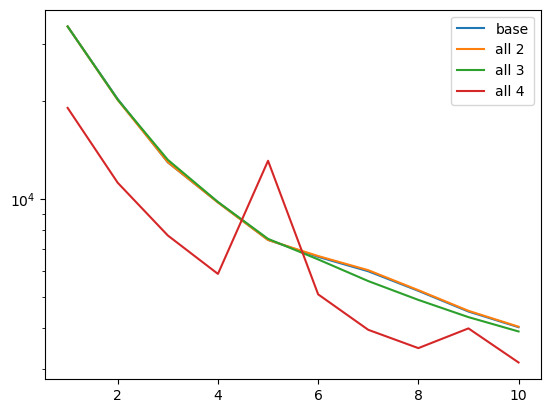

In [17]:
plt.yscale('log')
plt.plot(total_scores_base)
plt.plot(total_scores_all2)
plt.plot(total_scores_all3)
plt.plot(total_scores_all4)
plt.legend(['base', 'all 2', 'all 3', 'all 4'])

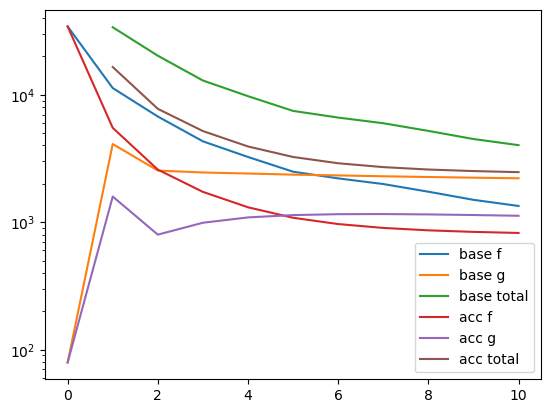

In [18]:
plt.yscale('log')
plt.plot(fscores_base)
plt.plot(gscores_base)
plt.plot(total_scores_base)

plt.plot(fscores_acc)
plt.plot(gscores_acc)
plt.plot(total_scores_acc)

plt.legend(['base f', 'base g', 'base total', 'acc f', 'acc g', 'acc total'])

## Rank = 3

In [19]:
# data = np.load('urban/2022_11_17/small/r6_ini.npz')
rank = 3
ini_W = np.random.rand(X.shape[0], rank)
ini_H = np.random.rand(rank, X.shape[1])

In [20]:
%%time
_, _, _, _, fscores_base, gscores_base, lambda_vals_base = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, scale_lambda=True)

CPU times: user 37.6 s, sys: 3.46 s, total: 41.1 s
Wall time: 5.28 s


In [21]:
%%time
_, _, _, _, fscores_z2, gscores_z2, lambda_vals_z2 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, scale_lambda=True, andersen_type='z', andersen_win=aa_size)

/Users/waqas/Desktop/seminmf/simple.py:57: RuntimeWarning: invalid value encountered in subtract
  new_yi_arr = yi_arr + rho * (new_wi_arr - new_z)


CPU times: user 1min 7s, sys: 8.54 s, total: 1min 15s
Wall time: 2min 27s


In [22]:
%%time
_, _, _, _, fscores_all2, gscores_all2, lambda_vals_all2 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, scale_lambda=True, andersen_type='all', andersen_win=aa_size)

CPU times: user 1min 38s, sys: 23.6 s, total: 2min 1s
Wall time: 16 s


In [23]:
%%time
_, _, _, _, fscores_acc, gscores_acc, lambda_vals_acc = nmf_son_acc(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, scale_lambda=True)

CPU times: user 15.8 s, sys: 1.42 s, total: 17.2 s
Wall time: 2.26 s


In [24]:
total_scores_base = fscores_base + lambda_vals_base * gscores_base
total_scores_z2 = fscores_z2 + lambda_vals_z2 * gscores_z2
total_scores_all2 = fscores_all2+ lambda_vals_all2 * gscores_all2
total_scores_acc = fscores_acc + lambda_vals_acc * gscores_acc

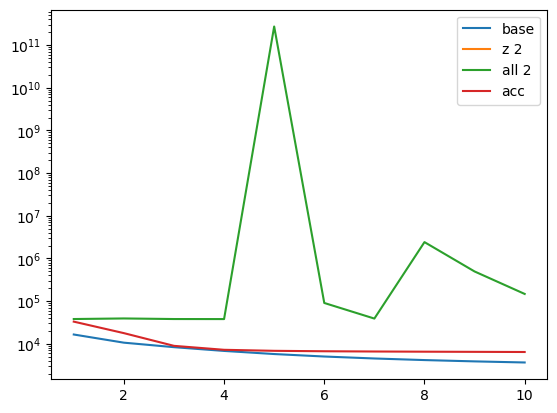

In [25]:
plt.yscale('log')
plt.plot(total_scores_base)
plt.plot(total_scores_z2)
plt.plot(total_scores_all2)
plt.plot(total_scores_acc)
plt.legend(['base', 'z 2', 'all 2', 'acc'])

In [26]:
_, _, _, _, fscores_z3, gscores_z3, lambda_vals_z3 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, scale_lambda=True, andersen_type='z', andersen_win=2)
_, _, _, _, fscores_z4, gscores_z4, lambda_vals_z4 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, scale_lambda=True, andersen_type='z', andersen_win=4)

In [27]:
total_scores_z3 = fscores_z3 + lambda_vals_z3 * gscores_z3
total_scores_z4 = fscores_z4 + lambda_vals_z4 * gscores_z4

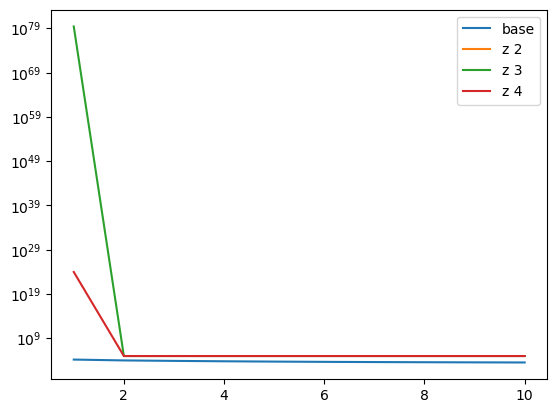

In [28]:
plt.yscale('log')
plt.plot(total_scores_base)
plt.plot(total_scores_z2)
plt.plot(total_scores_z3)
plt.plot(total_scores_z4)
plt.legend(['base', 'z 2', 'z 3', 'z 4'])

In [29]:
_, _, _, _, fscores_all3, gscores_all3, lambda_vals_all3 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, scale_lambda=True, andersen_type='all', andersen_win=2)
_, _, _, _, fscores_all4, gscores_all4, lambda_vals_all4 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, scale_lambda=True, andersen_type='all', andersen_win=4)

In [30]:
total_scores_all3 = fscores_all3 + lambda_vals_all3 * gscores_all3
total_scores_all4 = fscores_all4 + lambda_vals_all4 * gscores_all4

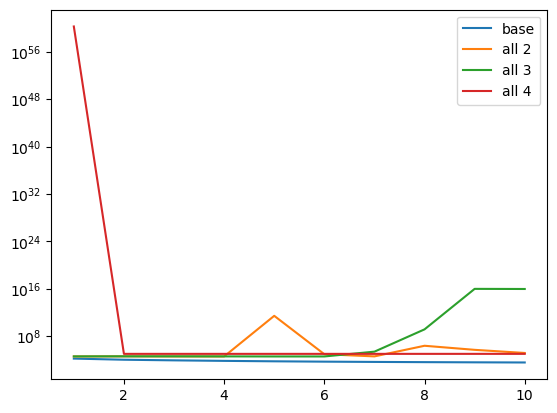

In [31]:
plt.yscale('log')
plt.plot(total_scores_base)
plt.plot(total_scores_all2)
plt.plot(total_scores_all3)
plt.plot(total_scores_all4)
plt.legend(['base', 'all 2', 'all 3', 'all 4'])

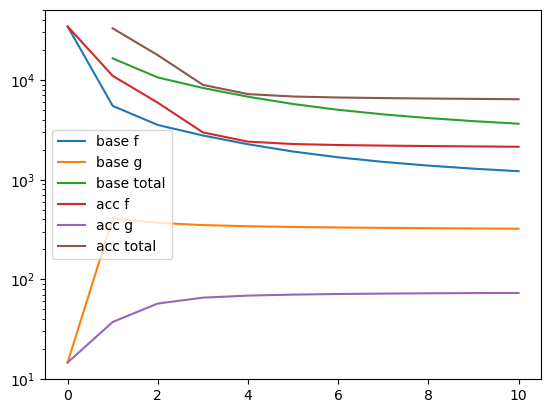

In [32]:
plt.yscale('log')
plt.plot(fscores_base)
plt.plot(gscores_base)
plt.plot(total_scores_base)

plt.plot(fscores_acc)
plt.plot(gscores_acc)
plt.plot(total_scores_acc)

plt.legend(['base f', 'base g', 'base total', 'acc f', 'acc g', 'acc total'])